In [1]:
!pip install kagglehub

In [2]:
# downloading the data
import kagglehub


In [3]:
#Downloading
path = kagglehub.dataset_download("msambare/fer2013")
print('path to dataset files :',path)

path to dataset files : /kaggle/input/fer2013


In [4]:
#install tensorflow
!pip install tensorflow

In [5]:
#importing important libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from os import walk #only for counting images

In [6]:
#step 3 :set dataset paths
train_data = '/kaggle/input/fer2013/train'
test_data = '/kaggle/input/fer2013/test'

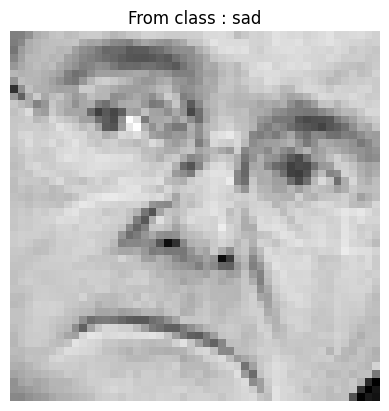

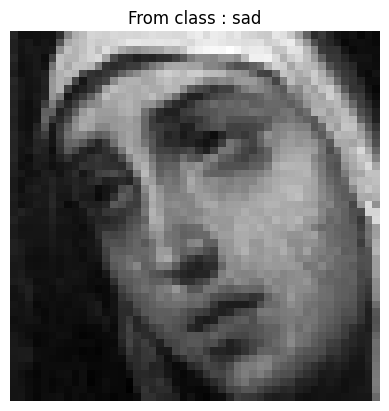

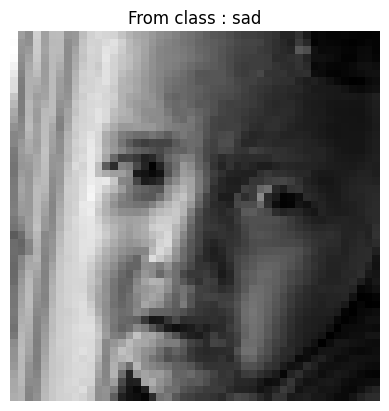

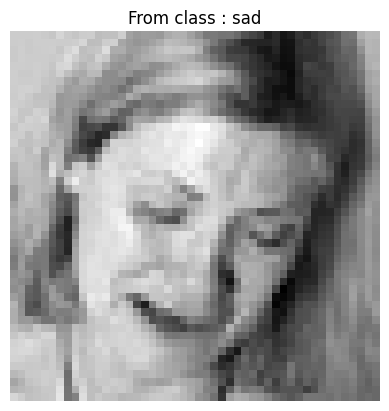

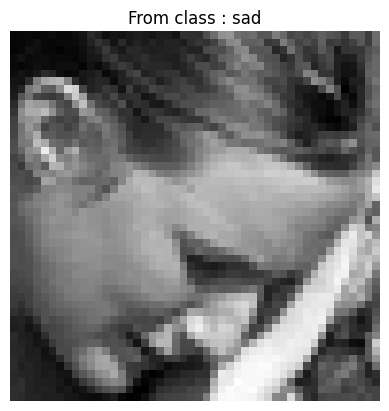

In [10]:
#preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# manually pick a class and image
# list image files inside the class folder
sample_class = os.listdir(train_data)[4]
sample_class_path = os.path.join(train_data, sample_class)
#list image files inside the class folder
image_files = os.listdir(sample_class_path)
#load and display the first 5 image
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L')#onvert to greyscale
    plt.imshow(image,cmap='gray')
    plt.title(f"From class : {sample_class}")
    plt.axis('off')
    plt.show()

In [11]:
#Step 4 data generators
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
# Model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [14]:
#counting the images
def count_images(folder_path):
  return sum(len(files) for _, _, files in walk(folder_path))

num_train_imgs = count_images(train_data)
num_test_imgs = count_images(test_data)

print("Number of training images:", num_train_imgs)
print("Number of testing images:", num_test_imgs)

Number of training images: 28709
Number of testing images: 7178


In [15]:
# Training the model
epochs = 30
history = model.fit(
    train_generator, steps_per_epoch = num_train_imgs // 32,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = num_test_imgs // 32
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 429s 475ms/step - accuracy: 0.2490 - loss: 1.8113 - val_accuracy: 0.3333 - val_loss: 1.6917
Epoch 2/30
  1/897 ━━━━━━━━━━━━━━━━━━━━ 10:10 681ms/step - accuracy: 0.4375 - loss: 1.9079

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.4375 - loss: 1.9079 - val_accuracy: 0.3344 - val_loss: 1.6918
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 502s 504ms/step - accuracy: 0.3090 - loss: 1.7058 - val_accuracy: 0.4336 - val_loss: 1.4960
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4688 - loss: 1.4432 - val_accuracy: 0.4297 - val_loss: 1.5013
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 447s 471ms/step - accuracy: 0.3857 - loss: 1.5590 - val_accuracy: 0.4696 - val_loss: 1.3721
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.4688 - loss: 1.5011 - val_accuracy: 0.4688 - val_loss: 1.3755
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 442s 492ms/step - accuracy: 0.4430 - loss: 1.4418 - val_accuracy: 0.5159 - val_loss: 1.2713
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.3438 - loss: 1.4938 - val_accuracy: 0.5144 - val_loss: 1.2706
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 444s 473ms/step - accuracy: 0.4726 - loss: 1.3801 - val

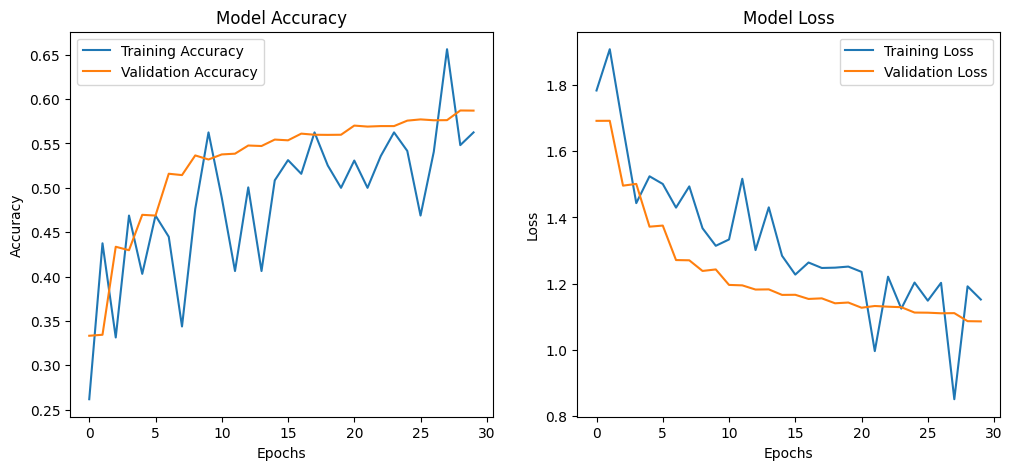

In [16]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize = (12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()